In [12]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_nqubit)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.quantum_fisher)


<module 'qtm.quantum_fisher' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomographyProject\\qtm\\quantum_fisher.py'>

In [13]:

# Init parameters
num_qubits = 3
theta = np.random.uniform(0, 2*np.pi)
thetas = np.ones((2*num_qubits*3))
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values_qng = qtm.base_qtm.fit(
    qc, num_steps = 1, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1
)



Step: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

[[ 0.16530207+0.16626169j]
 [ 0.02727678+0.22459083j]
 [ 0.02727678+0.22459083j]
 [ 0.00327174+0.04464834j]
 [-0.2544273 +0.01974571j]
 [ 0.09356723-0.00468031j]
 [ 0.09356723-0.00468031j]
 [ 0.06719822+0.05887074j]]
[[ 0.16530207-0.16626169j  0.02727678-0.22459083j  0.02727678-0.22459083j
   0.00327174-0.04464834j -0.2544273 -0.01974571j  0.09356723+0.00468031j
   0.09356723+0.00468031j  0.06719822-0.05887074j]]
[[ 0.0599012 +0.1167195j ]
 [-0.13201038+0.03871622j]
 [ 0.12353133-0.12536522j]
 [ 0.02895469-0.17377608j]
 [-0.02010297-0.11517942j]
 [-0.21499044-0.22310473j]
 [ 0.11925018-0.0084913j ]
 [ 0.13362332-0.1001741j ]]
[[ 0.0599012 -0.1167195j  -0.13201038-0.03871622j  0.12353133+0.12536522j
   0.02895469+0.17377608j -0.02010297+0.11517942j -0.21499044+0.22310473j
   0.11925018+0.0084913j   0.13362332+0.1001741j ]]
[[-0.06270664+0.21681166j]
 [ 0.16767511+0.25474j   ]
 [ 0.02960534+0.03970907j]
 [-0.03769146+0.05659431j]
 [-0.11402896+0.04989487j]
 [ 0.05260403-0.17533082j]
 [-0

In [51]:
a = [
    [1,2,3],
    [4,5,6]
]
gradpsi = np.array(a)

print(gradpsi.shape)
# gradpsi = np.transpose(gradpsi)

# print(gradpsi)
# psi = np.array([1, 1 + 1j, 1], dtype=np.complex128)
# psi = np.expand_dims(psi , 1)

# F_elements = np.zeros(2, dtype = np.complex128)
# for i in range(2):

#     F_elements[i] = np.transpose(np.conjugate(psi)).dot(gradpsi[i])
#     print(F_elements[i])


(2, 3)


In [4]:
np.min(loss_values_qng)

0.0047607421875

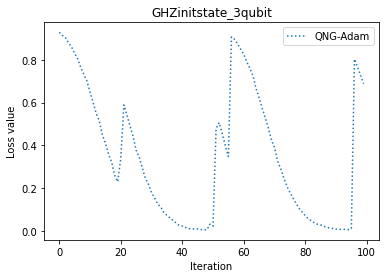

In [3]:
# Plot loss value in 100 steps

plt.plot(loss_values_qng, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 